# 布朗运动模拟

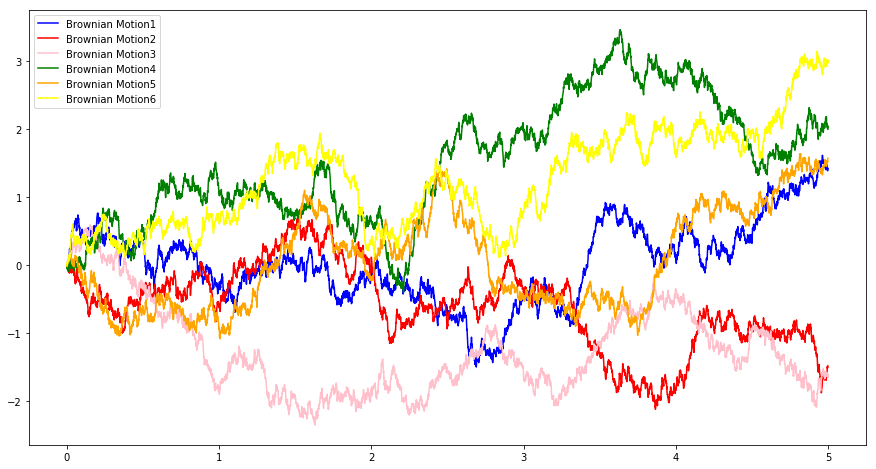

In [1]:
import numpy as np
import numpy.random as nprd

t=np.linspace(0.0,5.0,5000)
B1=np.zeros(len(t))
B2=np.zeros(len(t))
B3=np.zeros(len(t))
B4=np.zeros(len(t))
B5=np.zeros(len(t))
B6=np.zeros(len(t))
b1=b2=b3=b4=b5=b6=0
epsilon=np.sqrt(t[1]-t[0])
for tt in range(len(t)):
    B1[tt]=b1
    b1=b1+nprd.normal(0,epsilon)
    B2[tt]=b2
    b2=b2+nprd.normal(0,epsilon)
    B3[tt]=b3
    b3=b3+nprd.normal(0,epsilon)
    B4[tt]=b4
    b4=b4+nprd.normal(0,epsilon)
    B5[tt]=b5
    b5=b5+nprd.normal(0,epsilon)
    B6[tt]=b6
    b6=b6+nprd.normal(0,epsilon)
    
import matplotlib.pyplot as plt 
%matplotlib inline
# 设定图像大小
plt.rcParams['figure.figsize'] = (15.0, 8.0)

plt.plot(t,B1,label=r'Brownian Motion1',color='blue')
plt.plot(t,B2,label=r'Brownian Motion2',color='red')
plt.plot(t,B3,label=r'Brownian Motion3',color='pink')
plt.plot(t,B4,label=r'Brownian Motion4',color='green')
plt.plot(t,B5,label=r'Brownian Motion5',color='orange')
plt.plot(t,B6,label=r'Brownian Motion6',color='yellow')
plt.legend(loc='upper left', frameon=True)
plt.show() ## 画图

# 几何布朗运动模拟

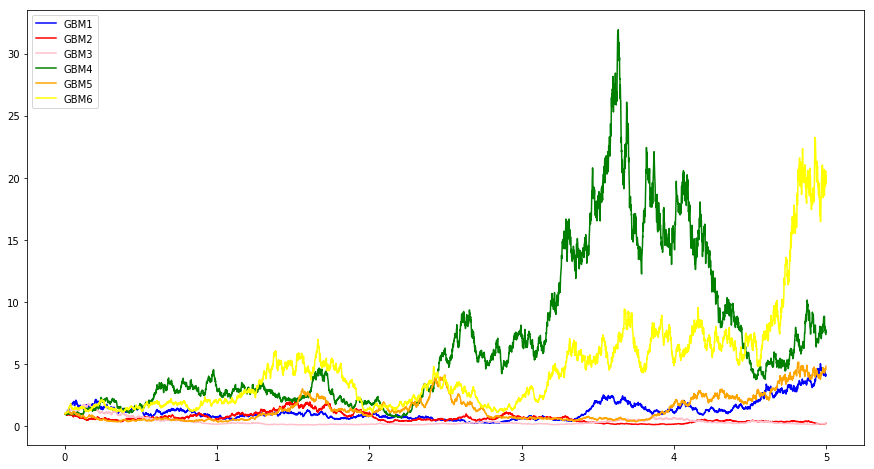

In [2]:
GB1=np.zeros(len(t))
GB2=np.zeros(len(t))
GB3=np.zeros(len(t))
GB4=np.zeros(len(t))
GB5=np.zeros(len(t))
GB6=np.zeros(len(t))
for tt in range(len(GB1)):
    GB1[tt]=np.exp(B1[tt])
    GB2[tt]=np.exp(B2[tt])
    GB3[tt]=np.exp(B3[tt])
    GB4[tt]=np.exp(B4[tt])
    GB5[tt]=np.exp(B5[tt])
    GB6[tt]=np.exp(B6[tt])

# 设定图像大小
plt.rcParams['figure.figsize'] = (15.0, 8.0)

plt.plot(t,GB1,label=r'GBM1',color='blue')
plt.plot(t,GB2,label=r'GBM2',color='red')
plt.plot(t,GB3,label=r'GBM3',color='pink')
plt.plot(t,GB4,label=r'GBM4',color='green')
plt.plot(t,GB5,label=r'GBM5',color='orange')
plt.plot(t,GB6,label=r'GBM6',color='yellow')
plt.legend(loc='upper left', frameon=True)
plt.show() ## 画图

# 布朗桥模拟

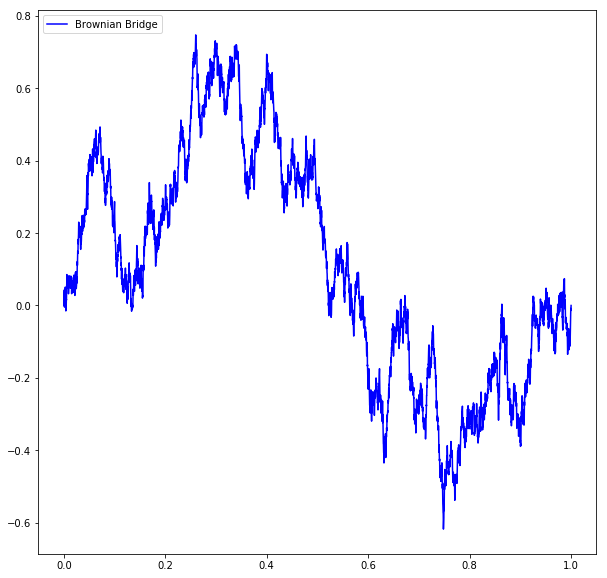

In [3]:
t=np.linspace(0.0,1.0,5000)
B=np.zeros(len(t))
BB=np.zeros(len(t))
b=0
epsilon=np.sqrt(t[1]-t[0])
for tt in range(len(t)):
    B[tt]=b
    b=b+nprd.normal(0,epsilon)
for tt in range(len(t)):
    BB[tt]=B[tt]-t[tt]*B[-1]
    
# 设定图像大小
plt.rcParams['figure.figsize'] = (10.0, 10.0)

plt.plot(t,BB,label=r'Brownian Bridge',color='blue')
plt.legend(loc='upper left', frameon=True)
plt.show() ## 画图

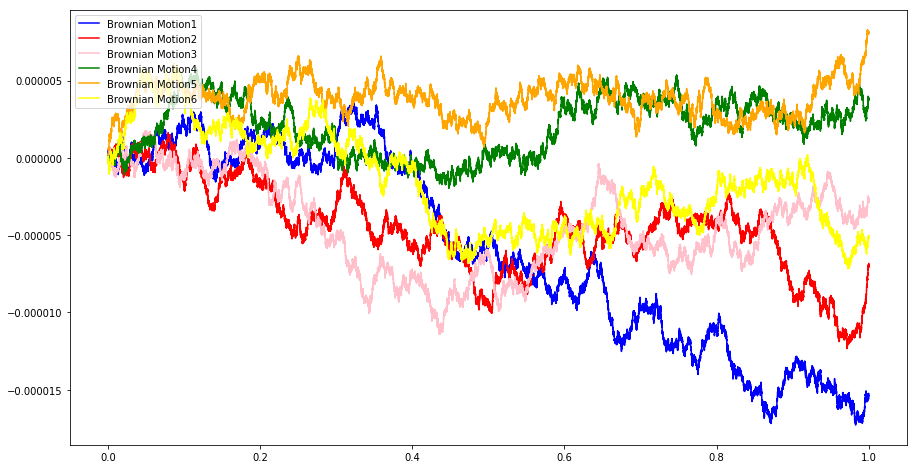

In [4]:
import numpy as np
import numpy.random as nprd

t=np.linspace(0.0,1.0,100000)
B1=np.zeros(len(t))
B2=np.zeros(len(t))
B3=np.zeros(len(t))
B4=np.zeros(len(t))
B5=np.zeros(len(t))
B6=np.zeros(len(t))
b1=b2=b3=b4=b5=b6=0
epsilon=np.sqrt(t[1]-t[0])**3
for tt in range(len(t)):
    B1[tt]=b1
    b1=b1+nprd.normal(0,epsilon)
    B2[tt]=b2
    b2=b2+nprd.normal(0,epsilon)
    B3[tt]=b3
    b3=b3+nprd.normal(0,epsilon)
    B4[tt]=b4
    b4=b4+nprd.normal(0,epsilon)
    B5[tt]=b5
    b5=b5+nprd.normal(0,epsilon)
    B6[tt]=b6
    b6=b6+nprd.normal(0,epsilon)
    
import matplotlib.pyplot as plt 
%matplotlib inline
# 设定图像大小
plt.rcParams['figure.figsize'] = (15.0, 8.0)

plt.plot(t,B1,label=r'Brownian Motion1',color='blue')
plt.plot(t,B2,label=r'Brownian Motion2',color='red')
plt.plot(t,B3,label=r'Brownian Motion3',color='pink')
plt.plot(t,B4,label=r'Brownian Motion4',color='green')
plt.plot(t,B5,label=r'Brownian Motion5',color='orange')
plt.plot(t,B6,label=r'Brownian Motion6',color='yellow')
plt.legend(loc='upper left', frameon=True)
plt.show() ## 画图